In [1]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

### News Groups 데이터 살펴보기

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train') # subset: 'train' or 'test'

In [3]:
# data 구조 확인
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
# data 개수 확인
len(data.data)

11314

In [5]:
# class label 확인
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# 데이터 내용 확인해보기
print(data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
# 해당 데이터의 label 확인
print(data.target[0])

7


In [8]:
# 해당 데이터의 class name 확인
print(data.target_names[7])

rec.autos


### 일부 class만 추출하여 학습용 / 테스트용으로 분리

In [9]:
from sklearn.datasets import fetch_20newsgroups

# 사용할 class 지정
categories = ['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

# training data
train = fetch_20newsgroups(subset='train', categories=categories)

# test data
test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [11]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [12]:
len(train.data)

2153

In [13]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [14]:
len(test.data)

1432

### 학습 (Multinomial Naive Bayes)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 학습 모델 정의
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [16]:
# training data로 학습
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
# test data에 대한 예측
preds = model.predict(test.data)

In [18]:
# test data 예측 결과 보기(앞의 10개만)
preds[:10]

array([2, 0, 1, 0, 1, 2, 1, 1, 0, 1])

In [19]:
# test data 정답 결과 보기(앞의 10개만)
test.target[:10]

array([3, 0, 1, 0, 1, 2, 1, 1, 0, 1])

In [20]:
# test data 전체에 대한 accuracy 확인
# 정확도 (accuracy)
(preds==test.target).mean()

0.8016759776536313

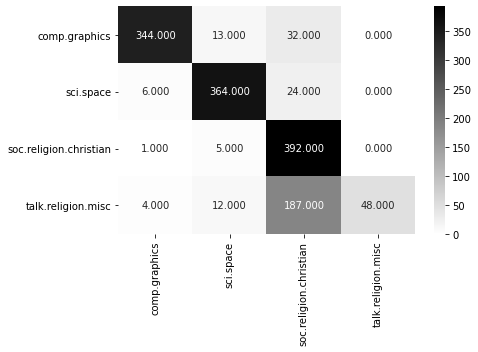

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# confusion matrix 그리기
x_lab = test.target_names
y_lab = test.target_names

conf_matrix = confusion_matrix(test.target, preds)
#conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

In [22]:
# precision, recall, F1
from sklearn.metrics import classification_report

print(classification_report(test.target, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9690    0.8843    0.9247       389
           1     0.9239    0.9239    0.9239       394
           2     0.6173    0.9849    0.7590       398
           3     1.0000    0.1912    0.3211       251

    accuracy                         0.8017      1432
   macro avg     0.8775    0.7461    0.7322      1432
weighted avg     0.8643    0.8017    0.7726      1432



### 새로운 데이터를 분류해보기

In [23]:
model.predict(['my monitor has high resolution'])

array([0])

In [24]:
test.target_names[0]

'comp.graphics'

In [25]:
model.predict(['spaceship rocket launch'])

array([1])

In [26]:
test.target_names[1]

'sci.space'

In [27]:
model.predict(['semin ryu church bible'])

array([2])

In [28]:
test.target_names[2]

'soc.religion.christian'